Feature shape: (569, 2), Labels shape: (569,)
Accuracy: 0.9035087719298246
Confusion Matrix:
 [[36  7]
 [ 4 67]]


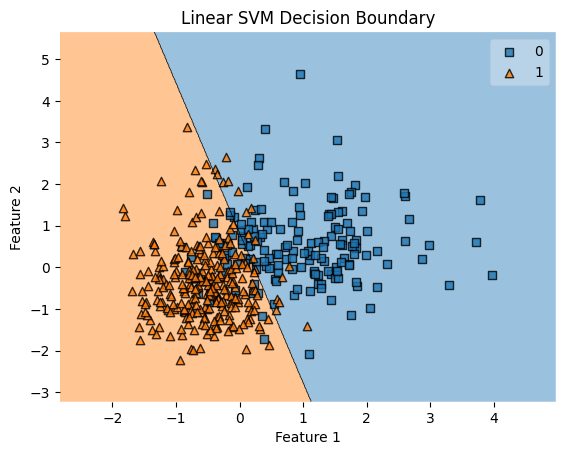

Accuracy: 0.9210526315789473
Confusion Matrix:
 [[38  5]
 [ 4 67]]


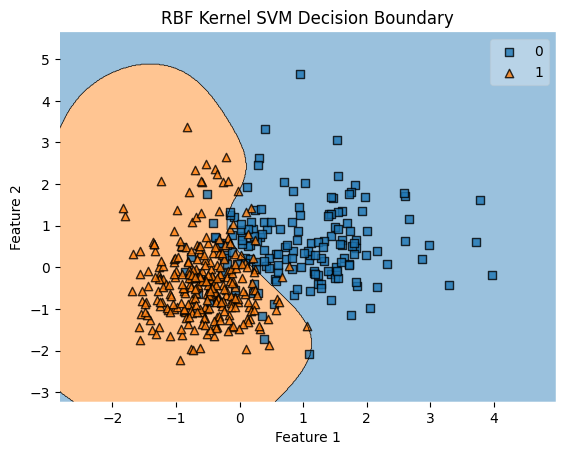

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation scores: [0.85964912 0.87719298 0.90350877 0.93859649 0.90265487]
Average CV Score: 0.8963204471355379


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

data = load_breast_cancer()
X = data.data[:, :2]  # Only take first 2 features for 2D visualization
y = data.target

print(f"Feature shape: {X.shape}, Labels shape: {y.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

plot_decision_regions(X_train, y_train, clf=svc_linear)
plt.title('Linear SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

svc_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

plot_decision_regions(X_train, y_train, clf=svc_rbf)
plt.title('RBF Kernel SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

scores = cross_val_score(SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
                         X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV Score:", np.mean(scores))
